In [114]:
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np
from scipy.stats import zscore
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
# Introduction
# Our dataset comes from Kaggle, and can be found at here: https://www.kaggle.com/datasets/sudhanvahg/wind-turbine-power-generation-forecasting
# This dataset includes data on the hourly meteorological data along with power output measurements from wind turbines collected between Jan 2013 
# and December 2016. The data is split into two portions, a train set and a test set. The included variables are temperature, relative humidity,
# windspeed at different altitudes (2m,10m, 100m), as well as dew point, and wind direction for these altitudes as well. There are 140160 entries
# in our train dataset, and 35040 entries in our test dataset. There are no null values.

# Let's also discuss our goal for the project a bit. My intentions are to create a model that can predict the power generated by turbines
# as accurately as possible, with our model producing an r^2 value of above .7 at the least when comparing test values to predicted values. 

In [60]:
# What is regression?
# Linear regression is a method used to model relationships between data, and uses known values to predict unknown target values. It attempts to fit
# lines to our data, and then picks the best line to then predict target values based off of that line. One of the ways to measure how good of a model 
# we have is the R-squared value of a model. The R-squared value is a ratio of the residual sum of squared divided by the total sum of squares.

In [61]:
wt_train_df_raw = pd.read_csv("train.csv");
wt_test_df_raw = pd.read_csv("test.csv");

In [62]:
wt_train_df_raw.describe()

Unnamed: 0       Location        Temp_2m      RelHum_2m  \
count  140160.000000  140160.000000  140160.000000  140160.000000   
mean    17519.500000       2.500000      45.912162      70.420512   
std     10115.212797       1.118038      21.930554      17.000203   
min         0.000000       1.000000     -31.420400       8.664205   
25%      8759.750000       1.750000      29.579600      57.664205   
50%     17519.500000       2.500000      45.879600      72.664205   
75%     26279.250000       3.250000      64.579600      84.664205   
max     35039.000000       4.000000      94.479600      99.664205   

               DP_2m         WS_10m        WS_100m         WD_10m  \
count  140160.000000  140160.000000  140160.000000  140160.000000   
mean       35.867228       4.352948       6.924278     200.684417   
std        20.979720       2.027149       3.056636     100.079917   
min       -36.627405       0.165389       0.007799       0.051683   
25%        21.172595       2.815389       4.747799     128.051683   
50%        35.672595       4.055389       6.717799     211.051683   
75%        53.872595       5.575389       8.847799     287.051683   
max        78.272595      18.695389      24.597799     359.051683   

             WD_100m         WG_10m          Power  
count  140160.000000  140160.000000  140160.000000  
mean      200.649010       8.027673       0.312437  
std       101.105919       3.626641       0.253774  
min        -0.942685       0.436515      -0.000004  
25%       127.057315       5.236515       0.099696  
50%       211.057315       7.636515       0.246896  
75%       289.057315      10.236515       0.486396  
max       359.057315      28.936515       0.988796

In [63]:
wt_test_df_raw.describe()

Unnamed: 0     Location       Temp_2m     RelHum_2m         DP_2m  \
count  35040.000000  35040.00000  35040.000000  35040.000000  35040.000000   
mean   39419.500000      2.50000     48.529326     67.415432     36.975266   
std     2528.830248      1.11805     22.215776     18.380048     20.722451   
min    35040.000000      1.00000    -26.920400     15.664205    -32.727405   
25%    37229.750000      1.75000     31.879600     53.664205     22.672595   
50%    39419.500000      2.50000     49.679600     68.664205     36.372595   
75%    41609.250000      3.25000     66.879600     82.664205     55.072595   
max    43799.000000      4.00000    101.479600     99.664205     75.272595   

             WS_10m       WS_100m        WD_10m       WD_100m        WG_10m  
count  35040.000000  35040.000000  35040.000000  35040.000000  35040.000000  
mean       4.203348      6.738558    200.467978    200.385882      7.762908  
std        1.949184      2.988170     97.856886     98.978351      3.572855  
min        0.165389      0.107799      0.051683     -0.942685      0.436515  
25%        2.725389      4.587799    133.051683    132.057315      5.036515  
50%        3.885389      6.557799    205.051683    205.057315      7.336515  
75%        5.405389      8.637799    284.051683    286.057315     10.036515  
max       15.535389     22.847799    359.051683    359.057315     29.136515

In [64]:
wt_train_df_raw.isna().sum()

Unnamed: 0    0
Time          0
Location      0
Temp_2m       0
RelHum_2m     0
DP_2m         0
WS_10m        0
WS_100m       0
WD_10m        0
WD_100m       0
WG_10m        0
Power         0
dtype: int64

In [65]:
wt_test_df_raw.isna().sum()

Unnamed: 0    0
Time          0
Location      0
Temp_2m       0
RelHum_2m     0
DP_2m         0
WS_10m        0
WS_100m       0
WD_10m        0
WD_100m       0
WG_10m        0
dtype: int64

In [66]:
wt_train_df_raw.head()

Unnamed: 0              Time  Location  Temp_2m  RelHum_2m      DP_2m  \
0           0  02-01-2013 00:00         1  28.2796  84.664205  24.072595   
1           1  02-01-2013 01:00         1  28.1796  85.664205  24.272595   
2           2  02-01-2013 02:00         1  26.5796  90.664205  24.072595   
3           3  02-01-2013 03:00         1  27.1796  87.664205  23.872595   
4           4  02-01-2013 04:00         1  27.0796  87.664205  23.672595   

     WS_10m   WS_100m      WD_10m     WD_100m    WG_10m     Power  
0  1.605389  1.267799  145.051683  161.057315  1.336515  0.163496  
1  2.225389  3.997799  150.051683  157.057315  4.336515  0.142396  
2  1.465389  2.787799  147.051683  149.057315  3.136515  0.121396  
3  1.465389  2.697799   57.051683  104.057315  1.536515  0.100296  
4  2.635389  4.437799   57.051683   83.057315  3.936515  0.079296

In [67]:
# Preprocessing for our Models
# So far, The first thing I see we can drop is the "unnamed: 0" column, this appears to just be an index column for our data, which we won't need. 
# We'll also be dropping the location of each, since we really don't have any information on where exactly these locations are.
# We'll be dropping the time data as well for now. We'll likely revisit this later by potentially pulling out the time of day as well as 
# splitting our entries into the 4 seasons.
# In addition to this, there may be some outliers in our dataset that we can get rid of to look at more accurate data, since we have such a 
# large dataset it would be good to remove outliers as to not skew our results. We can check our graphs in a pairplot just to see if there are 
# potentially any outliers.

In [68]:
wt_test_df = wt_test_df_raw.drop('Unnamed: 0', axis=1)
wt_test_df = wt_test_df.drop('Location', axis = 1)
wt_test_df = wt_test_df.drop('Time', axis = 1)
wt_test_df.head()

Temp_2m  RelHum_2m      DP_2m    WS_10m   WS_100m      WD_10m     WD_100m  \
0  19.6796  89.664205  17.072595  1.085389  0.867799  192.051683  233.057315   
1  19.1796  90.664205  16.672595  1.665389  1.907799  183.051683  197.057315   
2  19.5796  88.664205  16.672595  1.845389  2.867799  162.051683  167.057315   
3  20.3796  85.664205  16.572595  2.325389  3.987799  166.051683  161.057315   
4  21.0796  82.664205  16.572595  2.265389  4.047799  182.051683  170.057315   

     WG_10m  
0  1.636515  
1  2.736515  
2  2.736515  
3  2.936515  
4  3.136515

In [69]:
wt_train_df = wt_train_df_raw.drop('Unnamed: 0', axis=1)
wt_train_df = wt_train_df.drop('Location', axis = 1)
wt_train_df = wt_train_df.drop('Time', axis = 1)
wt_train_df.head()

Temp_2m  RelHum_2m      DP_2m    WS_10m   WS_100m      WD_10m     WD_100m  \
0  28.2796  84.664205  24.072595  1.605389  1.267799  145.051683  161.057315   
1  28.1796  85.664205  24.272595  2.225389  3.997799  150.051683  157.057315   
2  26.5796  90.664205  24.072595  1.465389  2.787799  147.051683  149.057315   
3  27.1796  87.664205  23.872595  1.465389  2.697799   57.051683  104.057315   
4  27.0796  87.664205  23.672595  2.635389  4.437799   57.051683   83.057315   

     WG_10m     Power  
0  1.336515  0.163496  
1  4.336515  0.142396  
2  3.136515  0.121396  
3  1.536515  0.100296  
4  3.936515  0.079296

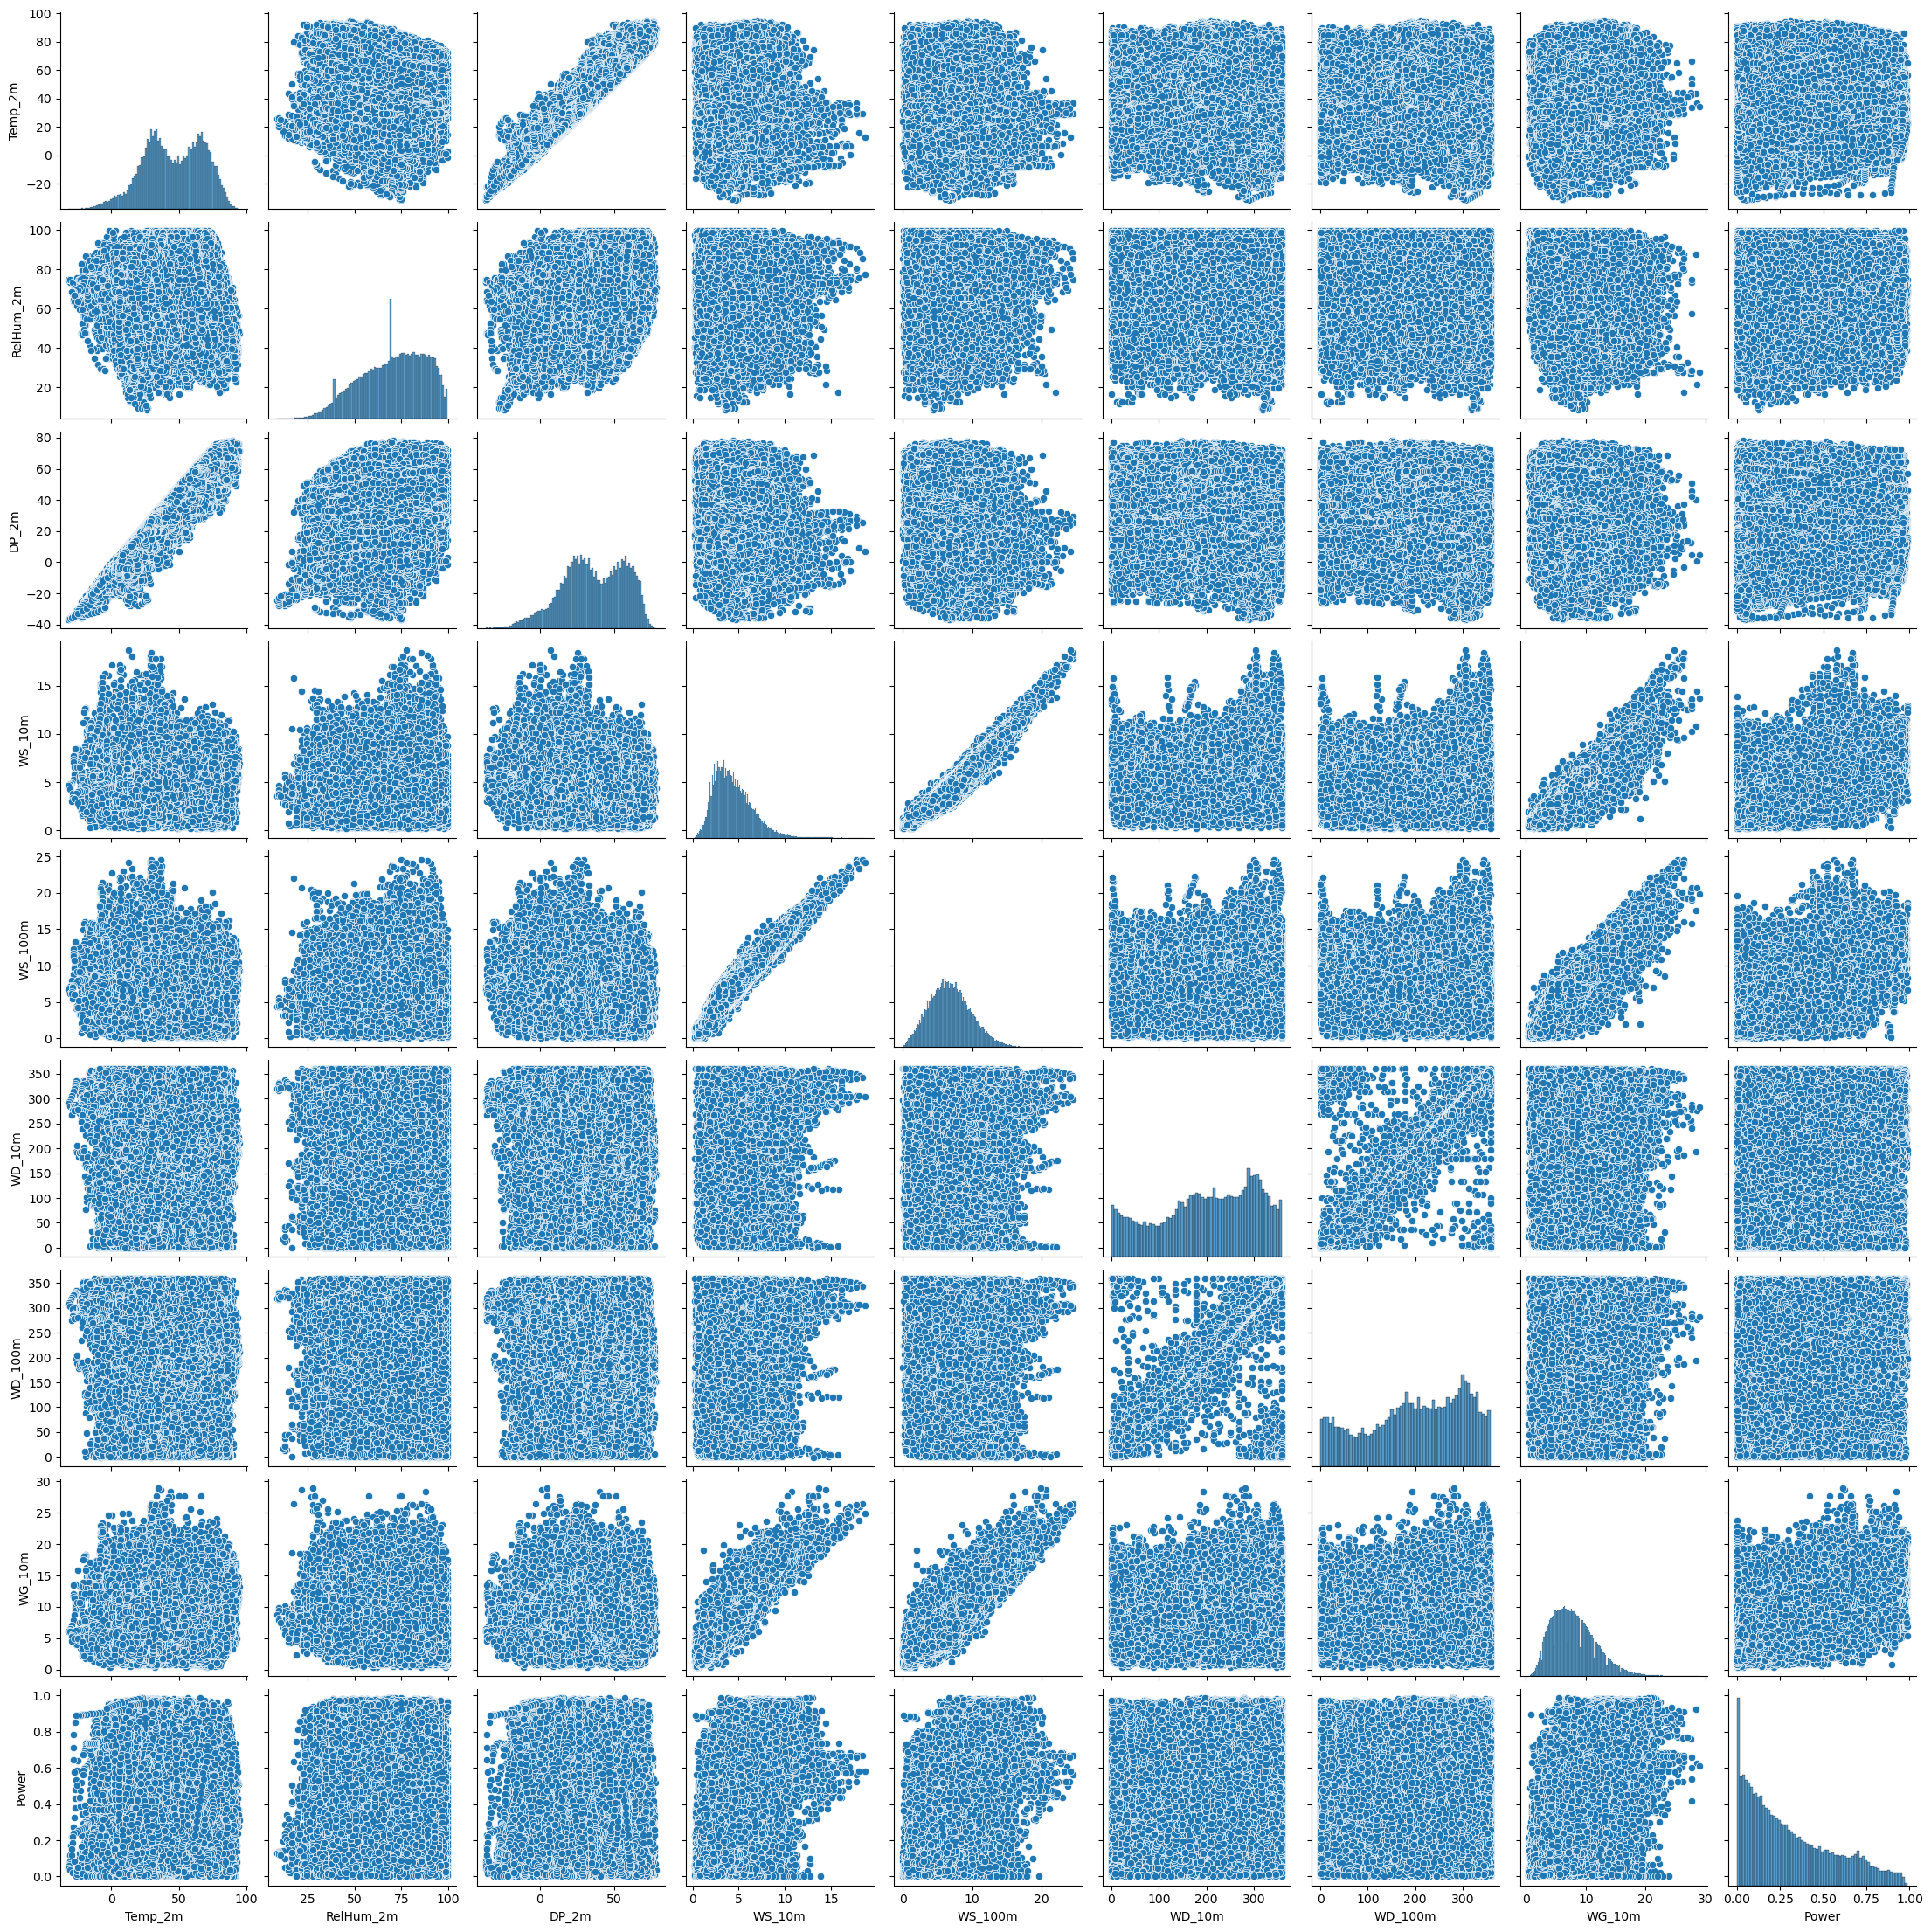

In [70]:
# Data Understanding/Visualization
sns.pairplot(wt_train_df)

In [71]:
# based on the above pairplot, it does look like we have a few outliers here and there, especially in our windspeed graphs, so lets figure out more 
# about how to deal with outliers. We can get the z-score from our data, which is a measurement that describes a values relationship relative to 
# our data's mean (average). It is measured in standard deviations from the mean, so a higher z-score is more indicative of the value being an outlier.
# we'll use this to remove values that are more than 3 standard deviations from the mean. 3 standard deviations should include about 99.7% of our data,
# so this is a great way for us to omit our outliers.

In [72]:
# To explain what we're doing below, we take the absolute value of each z-score, and we're removing those entries which have values that have z-scores
# that are more than 3 standard deviations from the mean of our data in either direction (below or above).
columns_to_score = ['Temp_2m','RelHum_2m','DP_2m','WS_10m','WS_100m','WD_10m','WD_100m','WG_10m','Power']
z_scores = np.abs(wt_train_df[columns_to_score].apply(zscore))
filtered_rows = (z_scores < 3).all(axis=1)
wt_train_df_flt = wt_train_df[filtered_rows]

In [73]:
wt_train_df_flt.describe()

Temp_2m      RelHum_2m          DP_2m         WS_10m  \
count  138519.000000  138519.000000  138519.000000  138519.000000   
mean       46.117744      70.478512      36.092496       4.282069   
std        21.803271      16.955317      20.827574       1.903810   
min       -19.820400      19.664205     -26.927405       0.165389   
25%        29.679600      57.664205      21.272595       2.805389   
50%        46.279600      72.664205      35.872595       4.015389   
75%        64.679600      84.664205      54.072595       5.515389   
max        94.479600      99.664205      78.272595      10.425389   

             WS_100m         WD_10m        WD_100m         WG_10m  \
count  138519.000000  138519.000000  138519.000000  138519.000000   
mean        6.828647     200.037186     199.993453       7.910036   
std         2.911459     100.063676     101.088483       3.446334   
min         0.007799       0.051683      -0.942685       0.436515   
25%         4.717799     127.051683     126.057315       5.236515   
50%         6.677799     210.051683     210.057315       7.536515   
75%         8.767799     287.051683     288.057315      10.236515   
max        16.067799     359.051683     359.057315      18.836515   

               Power  
count  138519.000000  
mean        0.309281  
std         0.251757  
min        -0.000004  
25%         0.098696  
50%         0.244196  
75%         0.480096  
max         0.985896

In [74]:
# With this, we've cut our dataframe down from 140160 entries to 138519 entries, meaning we've removed about 1641 entries that were outliers
# from our data. Awesome!

# Now let's gauge the relationships between our values, to do this, we'll be using a correlation matrix.

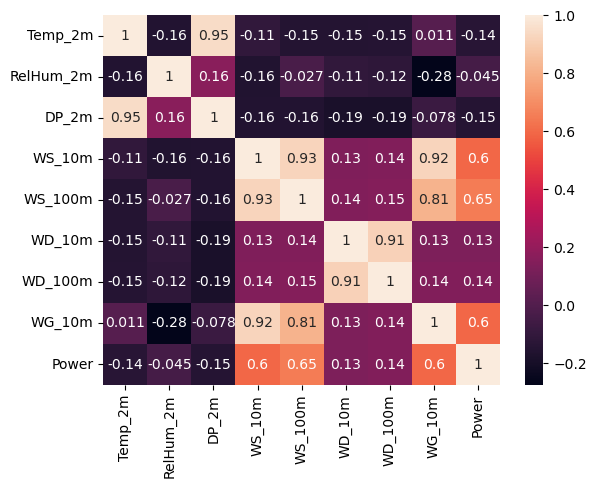

In [75]:
sns.heatmap(wt_train_df_flt.corr(), annot = True)
plt.show()

In [76]:
# Our data with the highest correlation to our power outputs are the wind speeds at 10m and 100m from the ground,
# as well as the wind gusts at 10m above the ground.

In [77]:
# Model 1

In [81]:
# At a glance, our provided test set doesn't include any values for the power generated, which doesn't help us much in creating our model. So we'll need
# to split and use our train data set to create our model.
X = wt_train_df_flt.drop(labels = 'Power', axis = 1)
y = wt_train_df_flt['Power']

In [90]:
# i'll split my train data into training data into train and test sets
# wt_train, wt_test = train_test_split(wt_train_df_model, test_size = .2, random_state = 42)
# target_train,target_test = train_test_split(wt_train_df_target, test_size = .2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (110815, 8)
X_test (27704, 8)
y_train (110815,)
y_test (27704,)


In [92]:
# Lets do a linear regression model on our train and test sets now!
wt_linear_model = linear_model.LinearRegression()
wt_linear_model.fit(X_train, y_train)

LinearRegression()

In [93]:
# lets see how well our training data performs
y_pred = wt_linear_model.predict(X_train)

In [95]:
wt_linear_model.score(X_train, y_train)

0.4754723450463729

In [94]:
# Currently, our model has an R-Squared value of about .48, which isn't great. Typically, the closer a value is to 1 the better, and our score right
# now isn't looking so hot. We might remedy this by removing some of those columns that we saw don't have a good correlation to our power generated
# on our correlation matrix, such as temperature and dew point at 2 meters.

In [127]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.18241379165429816

In [ ]:
# However, RMSE values closer to 0 are great, and as long as I didn't mess something up, our RMSE value is actually pretty solid. Our model might
# actually be redeemable!